## Business Rules for Minnesota

In [34]:
# packages used
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [35]:
# Load the data
data_dir = 'Data/'
Stores = pd.read_csv(data_dir + 'AllStoresMinnesota.csv', dtype = str)
StoreType = pd.read_csv(data_dir + 'NonLowPointStoresMinnesota.csv', dtype = str)

In [36]:
Stores.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG
0,105531125,DAKOTA,ON,DINING,CASUAL DINING,Y,Y
1,205646301,MORRISON,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y
2,105646889,AITKIN,ON,LODGING,FULL SERVICE LODGING,Y,Y
3,102004427,FILLMORE,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y
4,105645122,WINONA,ON,DINING,CASUAL DINING,Y,Y


In [37]:
StoreType.head()

,RTL_STORE_CD,BEERTYPE
0,101857377,NonLowPoint
1,107046430,NonLowPoint
2,101971024,NonLowPoint
3,102194556,NonLowPoint
4,205647194,NonLowPoint


In [38]:
FullData = pd.merge(Stores, StoreType, on="RTL_STORE_CD", how="left")

In [39]:
FullData.loc[FullData['BEERTYPE'].isnull(),"BEERTYPE"] = "LowPoint"

In [40]:
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_FIPS_COUNTY_DSC'],prefix='COUNTY')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_PREMISE_TYPE_CD'],prefix='PREMISE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_CHANNEL_DSC'],prefix='CHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_SUBCHANNEL_DSC'],prefix='SUBCHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_BEER_FLAG'],prefix='BEER_LICENSE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_LIQUOR_FLG'],prefix='LIQUOR_LICENSE')], axis=1)
FullData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_AITKIN,COUNTY_ANOKA,...,SUBCHANNEL_THEME PARK,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINE SPECIALTY STORE,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y
0,105531125,DAKOTA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,0,1,0,0,1
1,205646301,MORRISON,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,0,1,0,0,1
2,105646889,AITKIN,ON,LODGING,FULL SERVICE LODGING,Y,Y,NonLowPoint,1,0,...,0,0,0,0,0,0,1,0,0,1
3,102004427,FILLMORE,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,0,1,0,0,1
4,105645122,WINONA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,0,1,0,0,1


## Business Rules

In [41]:
FullData['RULES_PREDICT']=""
FullData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_AITKIN,COUNTY_ANOKA,...,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINE SPECIALTY STORE,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,RULES_PREDICT
0,105531125,DAKOTA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,
1,205646301,MORRISON,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,
2,105646889,AITKIN,ON,LODGING,FULL SERVICE LODGING,Y,Y,NonLowPoint,1,0,...,0,0,0,0,0,1,0,0,1,
3,102004427,FILLMORE,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,
4,105645122,WINONA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,


In [85]:
for row in range(0,len(FullData)):
    if FullData.loc[row,'RTL_PREMISE_TYPE_CD']=='OFF':
 
            else:
                FullData.loc[row,'RULES_PREDICT']='LowPoint'
        else:
            FullData.loc[row,'RULES_PREDICT']='LowPoint'
    if FullData.loc[row,'RTL_LIQUOR_FLG']=='N':
        if FullData.loc[row,'RTL_CHANNEL_DSC']=='RECREATION':
            FullData.loc[row,'RULES_PREDICT']='LowPoint'
        else:
            FullData.loc[row,'RULES_PREDICT']='NonLowPoint'
            

In [98]:
for row in range(0,len(FullData)):
    if "MILITARY" in FullData.loc[row,'RTL_SUBCHANNEL_DSC']:
        FullData.loc[row,'RULES_PREDICT']='NonLowPoint'
    elif FullData.loc[row,'RTL_PREMISE_TYPE_CD']=='OFF':
        if FullData.loc[row,'RTL_LIQUOR_FLG']=='N':
            FullData.loc[row,'RULES_PREDICT']='LowPoint'
        else:
            if FullData.loc[row,'RTL_CHANNEL_DSC']=='LIQUOR':
                FullData.loc[row,'RULES_PREDICT']='NonLowPoint'
            else:
                FullData.loc[row,'RULES_PREDICT']='LowPoint'
    else:
        if FullData.loc[row,'RTL_LIQUOR_FLG']=='N':
            if FullData.loc[row,'RTL_CHANNEL_DSC']=='RECREATION':
                FullData.loc[row,'RULES_PREDICT']='LowPoint'
            else:
                FullData.loc[row,'RULES_PREDICT']='NonLowPoint'
        else:
            FullData.loc[row,'RULES_PREDICT']='NonLowPoint'

In [99]:
FullData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_AITKIN,COUNTY_ANOKA,...,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINE SPECIALTY STORE,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,RULES_PREDICT
0,105531125,DAKOTA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,NonLowPoint
1,205646301,MORRISON,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,NonLowPoint
2,105646889,AITKIN,ON,LODGING,FULL SERVICE LODGING,Y,Y,NonLowPoint,1,0,...,0,0,0,0,0,1,0,0,1,NonLowPoint
3,102004427,FILLMORE,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,NonLowPoint
4,105645122,WINONA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,1,0,0,1,NonLowPoint


In [100]:
# Confusion Matrix Business Rules
cm_BRules = confusion_matrix(FullData['BEERTYPE'], FullData['RULES_PREDICT'])
cm_BRules

array([[ 708,   95],
       [ 181, 4754]])

In [101]:
# Accuracy
(cm_BRules[0,0]+cm_BRules[1,1])/(cm_BRules[0,0]+cm_BRules[0,1]+cm_BRules[1,0]+cm_BRules[1,1])

0.95189961659114675

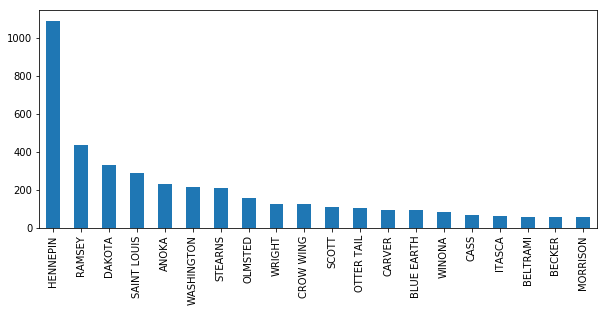

In [89]:
# Total Number of Stores by County
County = FullData.loc[:,'RTL_FIPS_COUNTY_DSC']
County = County.value_counts().head(20)
County.plot.bar(figsize=(10,4))

Total Stores:  5738
Total Low Point Stores:  803
Total Non Low Point Stores:  4935


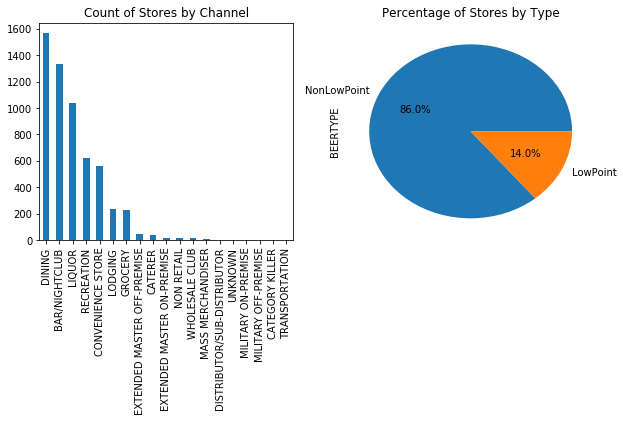

In [50]:
# Total Number Counts of Stores by Trade Channel
Channel = FullData.loc[:,'RTL_CHANNEL_DSC'].value_counts()
Type = FullData.loc[:,'BEERTYPE'].value_counts()

print("Total Stores: ",len(FullData))
print("Total Low Point Stores: ",len(FullData.loc[FullData["BEERTYPE"]=="LowPoint",:]))
print("Total Non Low Point Stores: ",len(FullData.loc[FullData["BEERTYPE"]=="NonLowPoint",:]))

#Plot Channels by Type of Beer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

Channel.plot(ax=axes[0], kind='bar'); axes[0].set_title('Count of Stores by Channel')
Type.plot(ax=axes[1], kind='pie',autopct='%1.1f%%'); axes[1].set_title('Percentage of Stores by Type')


In [51]:
# Count number of stores per channel
LowPointChannel =FullData.loc[FullData["BEERTYPE"]=="LowPoint",'RTL_CHANNEL_DSC'].value_counts()
NonLowPointChannel =FullData.loc[FullData["BEERTYPE"]=="NonLowPoint",'RTL_CHANNEL_DSC'].value_counts()

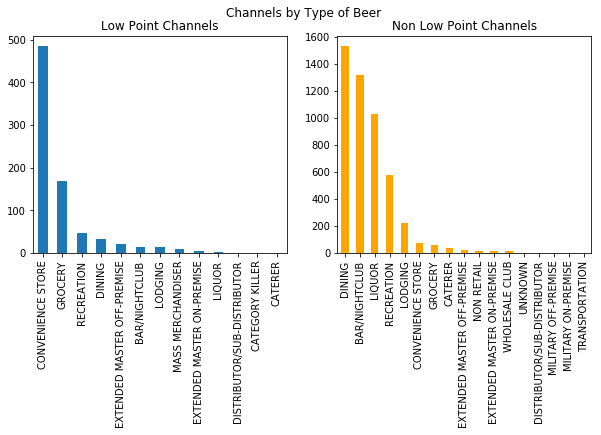

In [52]:
#Plot Channels by Type of Beer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

LowPointChannel.plot(ax=axes[0], kind='bar'); axes[0].set_title('Low Point Channels')
NonLowPointChannel.plot(ax=axes[1], kind='bar', color = 'orange'); axes[1].set_title('Non Low Point Channels')
fig.suptitle('Channels by Type of Beer')


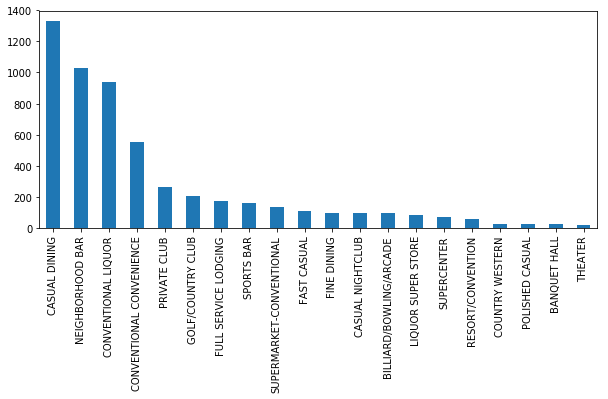

In [53]:
# Total Number of Stores by SubChannel
SubChannel = FullData.loc[:,'RTL_SUBCHANNEL_DSC']
SubChannel = SubChannel.value_counts().head(20)
SubChannel.plot.bar(figsize=(10,4))

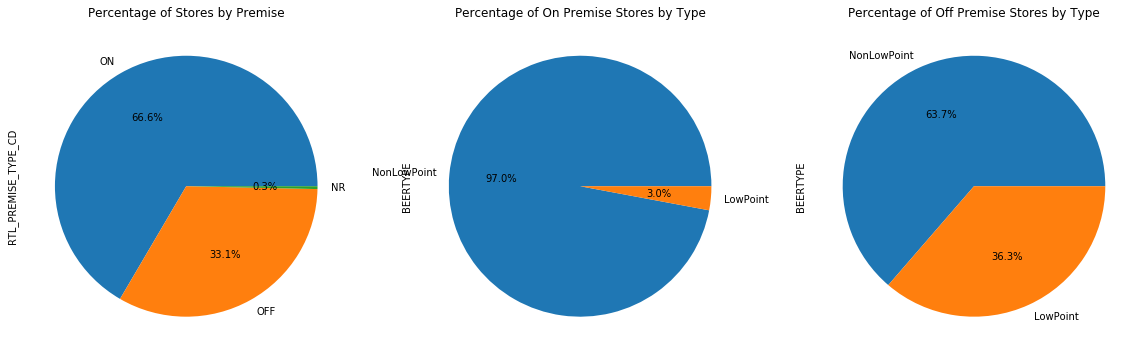

In [54]:
# Percentage of Stores which Off Premise vs On Premise
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

Premise = FullData.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
OnPremiseType = FullData.loc[FullData["RTL_PREMISE_TYPE_CD"]=="ON",'BEERTYPE'].value_counts()
OffPremiseType = FullData.loc[FullData["RTL_PREMISE_TYPE_CD"]=="OFF",'BEERTYPE'].value_counts()

Premise.plot(ax=axes[0], kind='pie',autopct='%1.1f%%'); axes[0].set_title('Percentage of Stores by Premise')
OnPremiseType.plot(ax=axes[1], kind='pie',autopct='%1.1f%%'); axes[1].set_title('Percentage of On Premise Stores by Type')
OffPremiseType.plot(ax=axes[2], kind='pie',autopct='%1.1f%%'); axes[2].set_title('Percentage of Off Premise Stores by Type')


### Prepare Data

In [58]:
# prepare data to fit model
X_labels = [c for c in FullData.columns if c not in ['RTL_STORE_CD','BEERTYPE','RTL_FIPS_COUNTY_DSC','RTL_PREMISE_TYPE_CD','RTL_CHANNEL_DSC','RTL_SUBCHANNEL_DSC','RTL_BEER_FLAG',"RTL_LIQUOR_FLG",'RULES_PREDICT']]
X = FullData.loc[:,X_labels]
Y = FullData['BEERTYPE']

In [59]:
range(0,10)

range(0, 10)

In [60]:
parameters = {'max_depth':range(1,21), 'min_samples_leaf':range(1,21,4), 'min_samples_split':range(2,21,4), 'random_state': [0]}
clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, n_jobs = -2)
clf.fit(X, Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'min_samples_leaf': range(1, 21, 4), 'random_state': [0], 'max_depth': range(1, 21), 'min_samples_split': range(2, 21, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'random_state': 0}

In [62]:
#try to find the best tree depth with min split.

#tree depth

#Fit a classification tree to the data with various values of the parameters max_depth and min_samples_leaf, 
#Report the cross-validation errors associated with different values of these parameters.

# change the parameter depth and compute test error
TreeDepth = range(1,21)
MinLeaf = range(1,21)
results = []
for d in TreeDepth:
    for l in MinLeaf:
        clf = tree.DecisionTreeClassifier(max_depth=d, min_samples_leaf=l,random_state=0)
        clf = clf.fit(X,Y)    
        scores = cross_val_score(clf, X, Y, cv=5)
        results.append((d,l,scores.mean(), scores.std()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','min_sample_leaf','mean','std'])
df_tree_accuracy['depth_leaf']= df_tree_accuracy['depth'].astype(str)+"_"+df_tree_accuracy['min_sample_leaf'].astype(str)

#sort the dataframe
df_tree_accuracy = df_tree_accuracy.sort_values(['mean'], ascending = False)
df_tree_accuracy.head()

,depth,min_sample_leaf,mean,std,depth_leaf
144,8,5,0.961660,0.003344,8_5
145,8,6,0.961659,0.004231,8_6
185,10,6,0.961485,0.004173,10_6
165,9,6,0.961485,0.004173,9_6
164,9,5,0.961311,0.003912,9_5


# Result

In [63]:
#the result: with the best tree depth and accuracy
best_depth = df_tree_accuracy[df_tree_accuracy['mean'] == max(df_tree_accuracy['mean'])]
best_depth = int(best_depth['depth'])

min_leaf = df_tree_accuracy[df_tree_accuracy['mean'] == max(df_tree_accuracy['mean'])]
min_leaf = int(min_leaf['min_sample_leaf'])
print('the best depth is:', best_depth, 'with min split:',min_leaf ,'with accuracy:',round(max(df_tree_accuracy['mean'])*100, 3), '%')



the best depth is: 8 with min split: 5 with accuracy: 96.166 %


In [64]:
#check the errors:

#create a new data frame to store the prediction result. 
result_df = FullData.loc[:, 'RTL_STORE_CD': 'BEERTYPE']
result_df['PRED_RESULT'] = clf.predict(X)
result_df.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
0,105531125,DAKOTA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,NonLowPoint
1,205646301,MORRISON,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y,NonLowPoint,NonLowPoint
2,105646889,AITKIN,ON,LODGING,FULL SERVICE LODGING,Y,Y,NonLowPoint,NonLowPoint
3,102004427,FILLMORE,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,NonLowPoint
4,105645122,WINONA,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,NonLowPoint


In [65]:
#check how many stores are predicted wrong; which are they; what characters do they have
error_index_list = []
for index in range(len(result_df)):
    if result_df.ix[index , 'BEERTYPE'] != result_df.ix[index , 'PRED_RESULT']:
        error_index_list.append(index)
print('there are', len(error_index_list), 'errors in the prediction')

there are 247 errors in the prediction


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [66]:
#check the error predictions
error_df = result_df.ix[error_index_list, ]
false_NonLowPoint = error_df.loc[error_df['BEERTYPE'] == 'LowPoint']
print('there are', len(false_NonLowPoint), 'false_NonLowPoint errors.')
false_NonLowPoint.head()

there are 113 false_NonLowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
18,107300928,RICE,ON,DINING,CASUAL DINING,Y,N,LowPoint,NonLowPoint
39,105645926,DOUGLAS,ON,RECREATION,GOLF/COUNTRY CLUB,Y,Y,LowPoint,NonLowPoint
57,105645751,WATONWAN,ON,RECREATION,PRIVATE CLUB,Y,Y,LowPoint,NonLowPoint
204,107242897,WATONWAN,ON,DINING,CASUAL DINING,Y,N,LowPoint,NonLowPoint
258,103123628,STEELE,ON,LODGING,FULL SERVICE LODGING,Y,Y,LowPoint,NonLowPoint


In [67]:
false_LowPoint = error_df.loc[error_df['BEERTYPE'] == 'NonLowPoint']
print('there are', len(false_LowPoint), 'false_LowPoint errors.')
false_LowPoint.head()

there are 134 false_LowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
60,100077640,RAMSEY,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,NonLowPoint,LowPoint
95,107047131,MORRISON,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,LowPoint
208,200692994,LYON,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,LowPoint
240,105646999,SAINT LOUIS,OFF,EXTENDED MASTER OFF-PREMISE,RESIDENTIAL ADDRESS,N,N,NonLowPoint,LowPoint
298,102573874,ITASCA,OFF,GROCERY,SUPERCENTER,Y,N,NonLowPoint,LowPoint


In [68]:
#create statistics for false_NonLowPoint
county_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_FIPS_COUNTY_DSC'].value_counts().head(15)
premise_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
channel_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_CHANNEL_DSC'].value_counts()
sub_channel_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_SUBCHANNEL_DSC'].value_counts()
beer_license_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_BEER_FLAG'].value_counts()
liquor_license_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_LIQUOR_FLG'].value_counts()

In [69]:
#create statistics for false_LowPoint
county_false_LowPoint = false_LowPoint.loc[:,'RTL_FIPS_COUNTY_DSC'].value_counts().head(15)
premise_false_LowPoint = false_LowPoint.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
channel_false_LowPoint = false_LowPoint.loc[:,'RTL_CHANNEL_DSC'].value_counts()
sub_channel_false_LowPoint = false_LowPoint.loc[:,'RTL_SUBCHANNEL_DSC'].value_counts()
beer_license_false_LowPoint = false_LowPoint.loc[:,'RTL_BEER_FLAG'].value_counts()
liquor_license_false_LowPoint = false_LowPoint.loc[:,'RTL_LIQUOR_FLG'].value_counts()

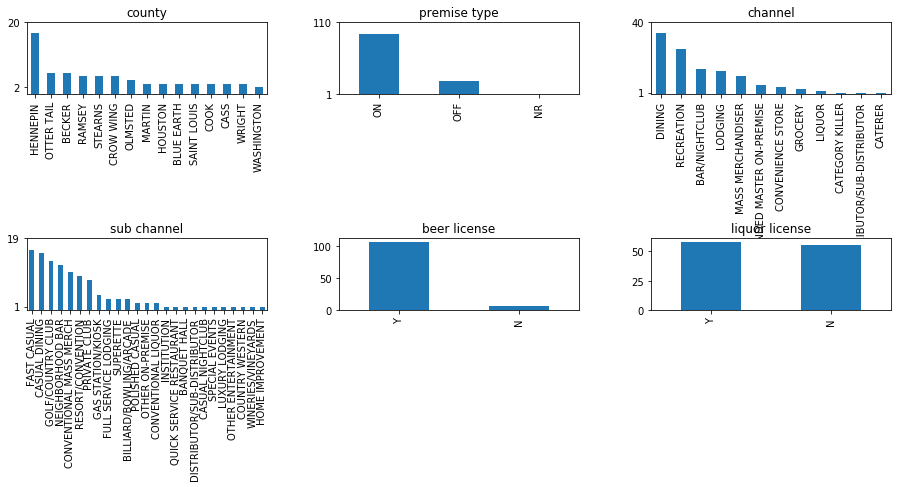

In [70]:
#plot for false_NonLowPoint
fig, axes = plt.subplots(nrows=2, ncols=3)

bottom_limit = 1
upper_limit = 1.2

county_false_NonLowPoint.plot(ax=axes[0,0], kind='bar'); axes[0,0].set_title('county')
axes[0,0].set_yticks([bottom_limit*min(county_false_NonLowPoint), int(upper_limit*max(county_false_NonLowPoint))])
   
premise_false_NonLowPoint.plot(ax=axes[0,1], kind='bar'); axes[0,1].set_title('premise type')
axes[0,1].set_yticks([bottom_limit*min(premise_false_NonLowPoint), int(upper_limit*max(premise_false_NonLowPoint))])

channel_false_NonLowPoint.plot(ax=axes[0,2], kind='bar'); axes[0,2].set_title('channel')
axes[0,2].set_yticks([bottom_limit*min(channel_false_NonLowPoint), int(upper_limit*max(channel_false_NonLowPoint))])

sub_channel_false_NonLowPoint.plot(ax=axes[1,0], kind='bar'); axes[1,0].set_title('sub channel')
axes[1,0].set_yticks([bottom_limit*min(sub_channel_false_NonLowPoint), int(upper_limit*max(sub_channel_false_NonLowPoint))])

beer_license_false_NonLowPoint.plot(ax=axes[1,1], kind='bar'); axes[1,1].set_title('beer license')

liquor_license_false_NonLowPoint.plot(ax=axes[1,2], kind='bar'); axes[1,2].set_title('liquor license')

#adjust the plot
plt.subplots_adjust(left=2, bottom=2, right=4, top=3, wspace=0.3, hspace=2)

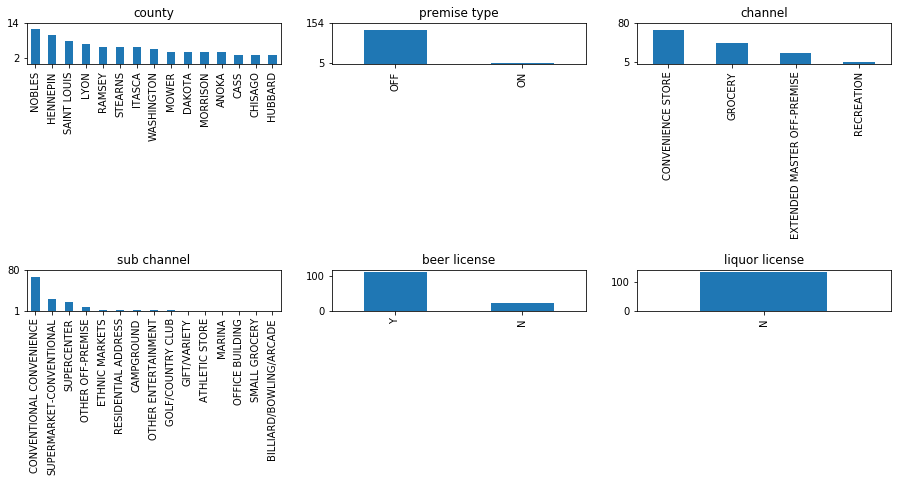

In [71]:
#plot for false_LowPoint
fig, axes = plt.subplots(nrows=2, ncols=3)

bottom_limit = 1
upper_limit = 1.2

county_false_LowPoint.plot(ax=axes[0,0], kind='bar'); axes[0,0].set_title('county')
axes[0,0].set_yticks([bottom_limit*min(county_false_NonLowPoint), int(upper_limit*max(county_false_LowPoint))])
   
premise_false_LowPoint.plot(ax=axes[0,1], kind='bar'); axes[0,1].set_title('premise type')
axes[0,1].set_yticks([bottom_limit*min(premise_false_LowPoint), int(upper_limit*max(premise_false_LowPoint))])

channel_false_LowPoint.plot(ax=axes[0,2], kind='bar'); axes[0,2].set_title('channel')
axes[0,2].set_yticks([bottom_limit*min(channel_false_LowPoint), int(upper_limit*max(channel_false_LowPoint))])

sub_channel_false_LowPoint.plot(ax=axes[1,0], kind='bar'); axes[1,0].set_title('sub channel')
axes[1,0].set_yticks([bottom_limit*min(sub_channel_false_LowPoint), int(upper_limit*max(sub_channel_false_LowPoint))])

beer_license_false_LowPoint.plot(ax=axes[1,1], kind='bar'); axes[1,1].set_title('beer license')

liquor_license_false_LowPoint.plot(ax=axes[1,2], kind='bar'); axes[1,2].set_title('liquor license')

#adjust the plot
plt.subplots_adjust(left=2, bottom=2, right=4, top=3, wspace=0.2, hspace=5)


In [72]:
#feature importance
clf = tree.DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=min_leaf,random_state=0)
clf = clf.fit(X,Y)

#all the features with their importance scores.
feature_score = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending = False)

#only show the features that have scores greater than 0
feature_score[feature_score > 0]


LIQUOR_LICENSE_N                                0.785346
PREMISE_OFF                                     0.097730
SUBCHANNEL_SUPERMARKET-NATURAL/GOURMET FOODS    0.017845
CHANNEL_WHOLESALE CLUB                          0.017113
CHANNEL_RECREATION                              0.016901
COUNTY_NOBLES                                   0.015751
COUNTY_ITASCA                                   0.010223
BEER_LICENSE_Y                                  0.009886
SUBCHANNEL_ETHNIC MARKETS                       0.005121
COUNTY_LYON                                     0.004385
SUBCHANNEL_CASUAL DINING                        0.003979
CHANNEL_NON RETAIL                              0.003238
COUNTY_CROW WING                                0.002294
COUNTY_HENNEPIN                                 0.002183
CHANNEL_LODGING                                 0.001452
COUNTY_SAINT LOUIS                              0.001394
SUBCHANNEL_GOLF/COUNTRY CLUB                    0.001237
COUNTY_COOK                    

In [73]:
# Confusion Matrix
cm = confusion_matrix(result_df['BEERTYPE'], result_df['PRED_RESULT'])
cm

array([[ 690,  113],
       [ 134, 4801]])

In [74]:
# True Positive Rate
TPR = cm[1,1]/(cm[1,1]+cm[1,0])
TPR

0.97284701114488348

In [75]:
# False Negative Rate
FNR = cm[1,0]/(cm[1,0]+cm[1,1])
FNR

0.027152988855116515

In [76]:
# True Negative Rate
TNR = cm[0,0]/(cm[0,0]+cm[0,1])
TNR

0.85927770859277708

In [77]:
# False Positive Rate
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
FPR

0.14072229140722292